In [1]:
from pathlib import Path
print("CWD:", Path.cwd())
print("ANG files here:", [p.name for p in Path.cwd().glob("*.ang")])


CWD: /home/menge/Downloads
ANG files here: ['AS.ang']


Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.18 s
Calculating rotation matrices... 0.03 s
Plotting Inverse Pole Figure... 0.17 s


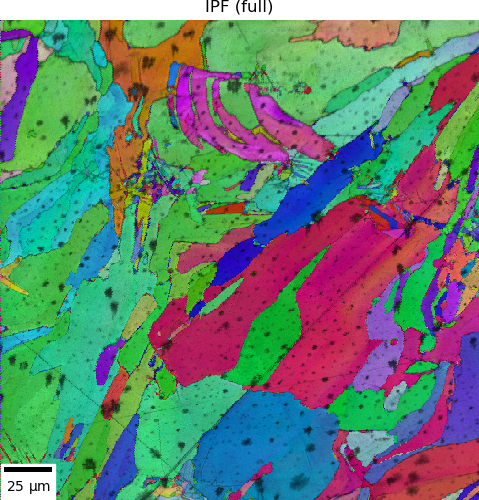

Plotting Inverse Pole Figure... 0.14 s


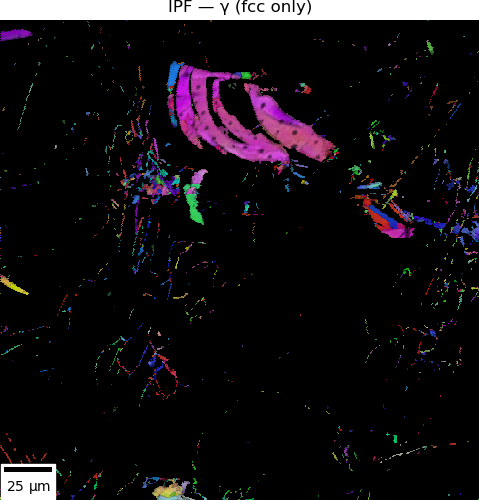

Plotting property map... 0.10 s


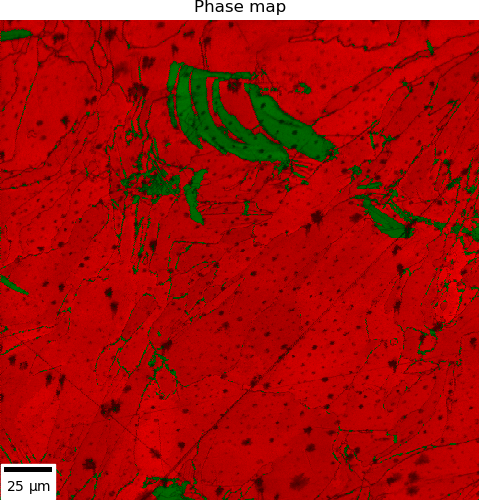

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pyebsd

angfile = Path("AS.ang")   # or the full path you copied

# load TSL .ang
scan = pyebsd.load_scandata(angfile)

# full IPF with IQ underlay (if IQ exists)
scan.plot_IPF(gray=getattr(scan, "IQ", None)); plt.title("IPF (full)")
plt.savefig("pyebsd_IPF_full.png", dpi=300); plt.show()

# IPF for fcc only (γ usually ph==2 in duplex exports)
scan.plot_IPF(sel=(scan.ph == 2), gray=getattr(scan, "IQ", None)); plt.title("IPF — γ (fcc only)")
plt.savefig("pyebsd_IPF_fcc_only.png", dpi=300); plt.show()

# phase map
scan.plot_phase(gray=getattr(scan, "IQ", None)); plt.title("Phase map")
plt.savefig("pyebsd_Phase_map.png", dpi=300); plt.show()


Plotting Inverse Pole Figure... 0.07 s


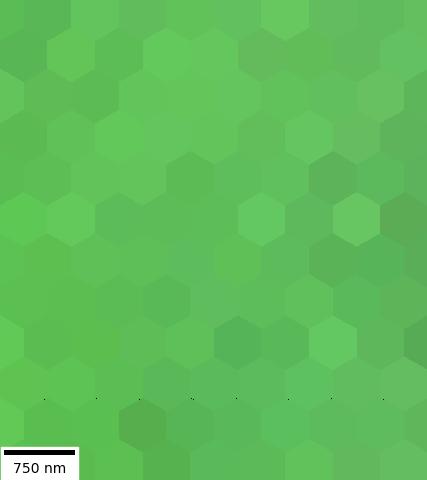

In [13]:
#Multiple selection criteria can be used simultaneously (don't forget the parentheses!).
# tiling='hex' enables hexagonal tiling
selection = (scan.ph == 1) & (scan.x > 25) & (scan.x < 30) & (scan.y > 35) & (scan.y < 40)
ipfmapfcc = scan.plot_IPF(sel=selection, gray=scan.IQ, tiling='hex')


Plotting property map... 0.11 s


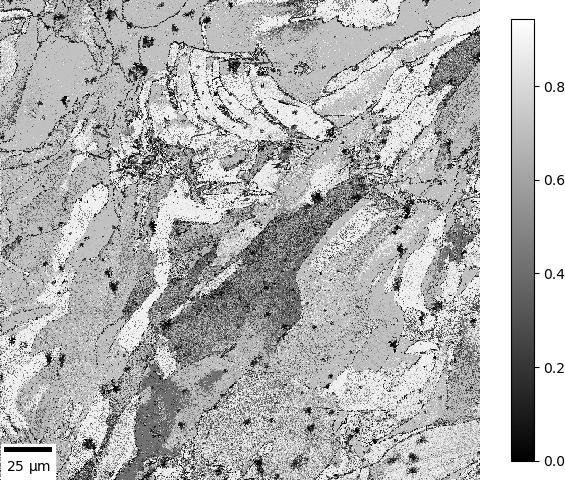

In [18]:
# Plot a generic property (in this case, CI) using gray color palette
# https://matplotlib.org/tutorials/colors/colormaps.html
phmap = scan.plot_property(scan.CI, cmap='gray')

Calculating misorientations for 266963 points for 18 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] in 4.58 s
Plotting property map... 0.10 s


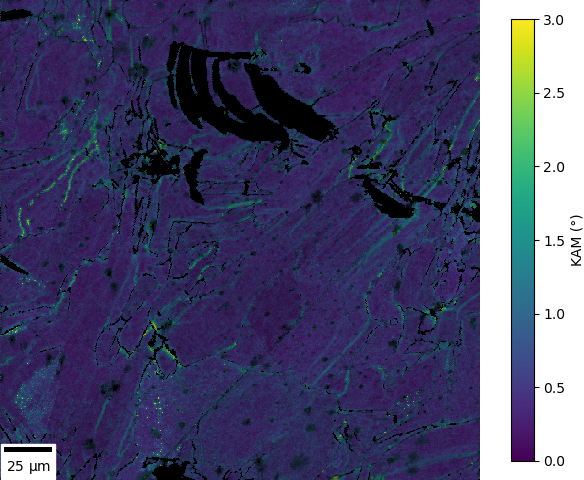

In [19]:
# Plot KAM map
# maxmis is the maximum misorientation used in the calculation of KAM
# vmax is the maximum value plotted
kammap = scan.plot_KAM(distance=2, perimeteronly=False, gray=scan.IQ, maxmis=5, vmax=3, sel=(scan.ph == 1))

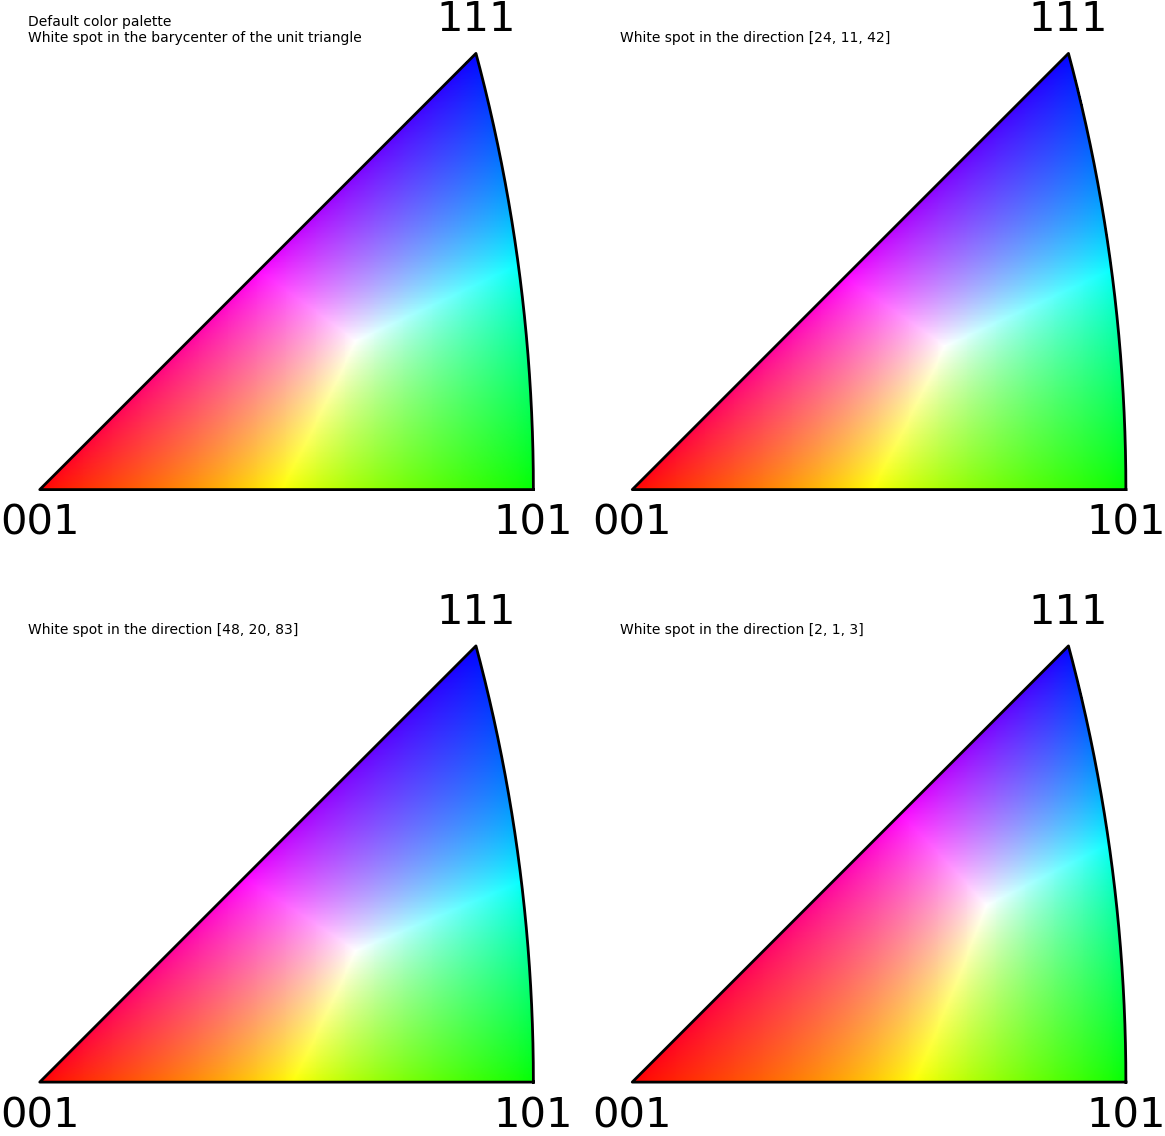

In [20]:
import matplotlib.pyplot as plt
import pyebsd

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.ravel()

pyebsd.unit_triangle(ax=ax1)
ax1.text(0, 1, ('Default color palette\n'
                'White spot in the barycenter of the unit triangle'),
         transform=ax1.transAxes)

# --------------------------------------------------

whitespot = [24, 11, 42]

pyebsd.unit_triangle(ax=ax2, whitespot=whitespot)
ax2.text(0, 1, 'White spot in the direction {}'.format(whitespot),
         transform=ax2.transAxes)

# --------------------------------------------------

whitespot = [48, 20, 83]

pyebsd.unit_triangle(ax=ax3, whitespot=whitespot)
ax3.text(0, 1, 'White spot in the direction {}'.format(whitespot),
         transform=ax3.transAxes)

# --------------------------------------------------

whitespot = [2, 1, 3]

pyebsd.unit_triangle(ax=ax4, whitespot=whitespot)
ax4.text(0, 1, 'White spot in the direction {}'.format(whitespot),
         transform=ax4.transAxes)

fig.set_tight_layout('tight')
plt.show()

Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.19 s
Plotting property map... 0.11 s
Calculating rotation matrices... 0.03 s
Plotting Inverse Pole Figure... 0.11 s
✅ Saved: EBSD_overlay_gamma_fcc_ph2.png


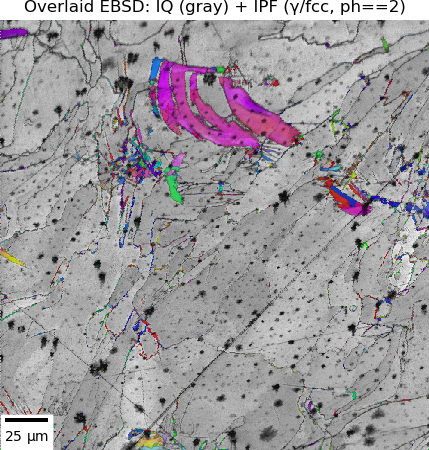

In [26]:
"""
Plotting overlaid EBSD maps (IQ background + γ/fcc IPF overlay)
- Works in Jupyter or as a script
- Safe handling if IQ is missing
- Simple, explicit filepath (no __file__/parent confusion)
"""

from pathlib import Path
import sys
import matplotlib.pyplot as plt

# ---- 1) Config: point this to your .ang file ----
ANGFILE = Path("AS.ang")  # if the notebook/script is next to AS.ang, this is enough
# Example absolute path if needed:
# ANGFILE = Path("/home/menge/Downloads/AS.ang")

# Optional: which phase id is γ (fcc) in your .ang export (commonly 2 in duplex)
GAMMA_FCC_ID = 2

# ---- 2) Imports & checks ----
try:
    import pyebsd
except Exception as e:
    sys.exit(
        f"[ERROR] pyebsd not installed in this kernel/env.\n"
        f"Install from GitHub (in a notebook cell):\n"
        f"  %pip install https://github.com/arthursn/pyebsd/archive/refs/heads/master.zip\n\n"
        f"Details: {e}"
    )

if not ANGFILE.exists():
    sys.exit(f"[ERROR] .ang file not found at: {ANGFILE.resolve()}")

# ---- 3) Load scan ----
scan = pyebsd.load_scandata(ANGFILE)

# Try to get IQ; if not present, fall back to None (pyebsd handles it)
IQ = getattr(scan, "IQ", None)

# ---- 4) Plot: IQ gray background + γ/fcc IPF overlay (transparent fill) ----
# IQ background
iqmap = scan.plot_property(IQ, cmap="gray", colorbar=False)

# IPF overlay for only the γ/fcc phase
scan.plot_IPF(
    sel=(scan.ph == GAMMA_FCC_ID),
    gray=IQ,
    colorfill="none",     # transparent background for overlay
    ax=iqmap.ax           # draw on the same axes as the IQ map
)

# Optional: title & tight layout
plt.title(f"Overlaid EBSD: IQ (gray) + IPF (γ/fcc, ph=={GAMMA_FCC_ID})")
plt.tight_layout()

# ---- 5) Save + show ----
out_png = f"EBSD_overlay_gamma_fcc_ph{GAMMA_FCC_ID}.png"
plt.savefig(out_png, dpi=300)
print(f"✅ Saved: {out_png}")

plt.show()


Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.17 s
Calculating rotation matrices... 0.03 s
Calculating misorientations for 266963 points for 18 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] in 4.76 s
Plotting property map... 0.10 s
✅ Saved: KAM_δ_(bcc)_d2_mm5.png


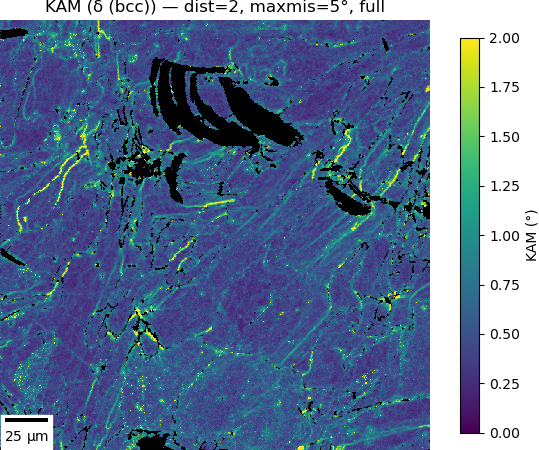

Calculating misorientations for 22326 points for 18 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] in 0.64 s
Plotting property map... 0.10 s
✅ Saved: KAM_γ_(fcc)_d2_mm5.png


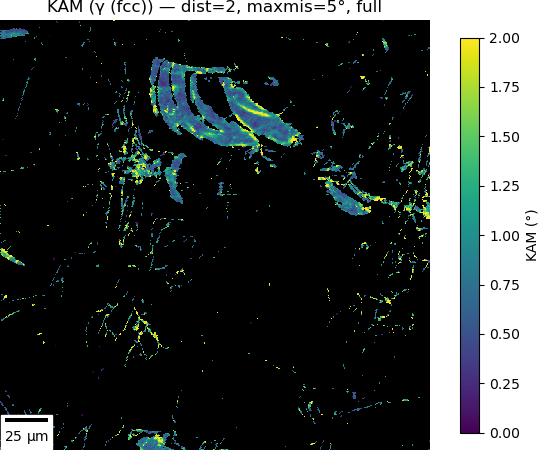

In [27]:
"""
Plotting Kernel Average Misorientation (KAM) from a TSL .ang file (pyebsd)
- Uses AS.ang in the current folder by default
- Plots KAM for γ (fcc, ph==2) and δ (bcc, ph==1) separately if present
- Consistent KAM window & colormap scaling for easy comparison
"""

from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt

# ====== USER KNOBS ======
ANGFILE = Path("AS.ang")   # change if your file lives elsewhere
GAMMA_ID = 2               # common duplex convention: γ (fcc) == 2
DELTA_ID = 1               # δ (bcc) == 1
DISTANCE   = 2             # KAM neighborhood distance (1 or 2 are common)
MAX_MIS_DEG = 5            # misorientation cap for KAM window (°)
PERIMETER_ONLY = False     # True: only pixels near boundaries
VMAX = 2                   # color scale upper bound for KAM (°)
CMAP = "viridis"           # pick your poison

# ====== IMPORTS & LOAD ======
try:
    import pyebsd
except Exception as e:
    sys.exit(
        "[ERROR] pyebsd not installed. In a notebook, run:\n"
        "  %pip install https://github.com/arthursn/pyebsd/archive/refs/heads/master.zip\n"
        f"Details: {e}"
    )

if not ANGFILE.exists():
    sys.exit(f"[ERROR] .ang file not found at: {ANGFILE.resolve()}")

# Prefer load_scandata (consistent with other examples). Fallback to load_ang_file if available.
try:
    scan = pyebsd.load_scandata(ANGFILE)
except AttributeError:
    # older/newer API variant
    scan = pyebsd.load_ang_file(ANGFILE)

# Phase IDs array (1-D)
ph = np.asarray(getattr(scan, "ph", None))
if ph is None or ph.size == 0:
    sys.exit("This .ang lacks phase IDs (scan.ph). Cannot make phase-separated KAM maps.")

# ====== KAM plotting helper ======
def plot_kam_for_phase(phase_id: int, title_tag: str):
    sel = (ph == phase_id)
    if not np.any(sel):
        print(f"[info] Phase id {phase_id} not found; skipping {title_tag}")
        return

    # pyebsd handles plotting internally; returns a container with .ax
    km = scan.plot_KAM(
        distance=DISTANCE,
        perimeteronly=PERIMETER_ONLY,
        maxmis=MAX_MIS_DEG,
        sel=sel,
        vmax=VMAX,
        cmap=CMAP,
    )
    ax = km.ax if hasattr(km, "ax") else plt.gca()
    ax.set_title(
        f"KAM ({title_tag}) — dist={DISTANCE}, maxmis={MAX_MIS_DEG}°, "
        f"{'perimeter-only' if PERIMETER_ONLY else 'full'}"
    )
    plt.tight_layout()
    out = f"KAM_{title_tag.replace(' ', '_')}_d{DISTANCE}_mm{MAX_MIS_DEG}.png"
    plt.savefig(out, dpi=300)
    print(f"✅ Saved: {out}")
    plt.show()

# ====== RUN: δ then γ (so you get both if present) ======
plot_kam_for_phase(DELTA_ID, "δ (bcc)")
plot_kam_for_phase(GAMMA_ID, "γ (fcc)")


Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.17 s
Calculating rotation matrices... 0.03 s
Calculating misorientations for 266963 points for 6 neighbors [1, 2, 3, 4, 5, 6] in 1.28 s
Calculating misorientations for 266963 points for 12 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] in 2.79 s
Calculating misorientations for 266963 points for 18 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] in 4.76 s
Calculating misorientations for 266963 points for 24 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24] in 5.98 s
Calculating misorientations for 266963 points for 30 neighbors [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] in 8.59 s
Plotting property map... 0.70 s


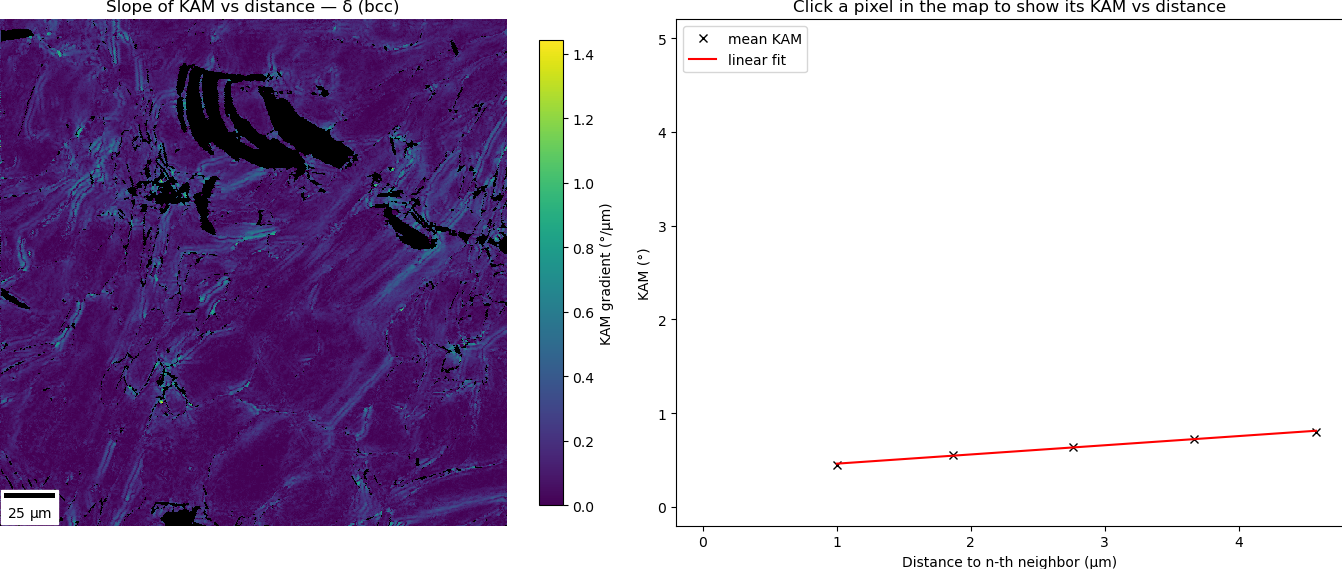

✅ Saved: KAM_vs_distance_phase1.png


In [28]:
# -*- coding: utf-8 -*-
"""
Interactive KAM vs distance (after:
[1] C. Moussa, M. Bernacki, R. Besnard, N. Bozzolo, Ultramicroscopy 179 (2017) 63–72.)

- Loads AS.ang from the current working directory (edit ANGFILE if needed)
- Choose which phase to analyze via TARGET_PHASE_ID (commonly: 1=δ(bcc), 2=γ(fcc))
- Left panel: map of KAM slope (°/µm), click anywhere to see per-pixel KAM vs distance on the right
"""

import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ========= USER KNOBS =========
ANGFILE = Path("AS.ang")      # or Path("/full/path/to/AS.ang")
TARGET_PHASE_ID = 1           # 1 → δ(bcc) ; 2 → γ(fcc). Change as needed.
CONVENTION = "OIM"            # "OIM" or "fixed" (same as pyebsd example)
MAX_MIS = 5.0                 # KAM window/upper cap (degrees)
N_NEIGHBORS = 5               # number of nearest neighbors to include (>=1)
TILING = "hex"                # "hex" or "square" for the slope map

# ========= IMPORTS / LOAD =========
try:
    import pyebsd
except Exception as e:
    sys.exit(
        "[ERROR] pyebsd not installed in this kernel.\n"
        "  In a notebook cell: %pip install https://github.com/arthursn/pyebsd/archive/refs/heads/master.zip\n"
        f"Details: {e}"
    )

if not ANGFILE.exists():
    sys.exit(f"[ERROR] .ang file not found at: {ANGFILE.resolve()}")

# Prefer a robust loader name across pyebsd revisions
try:
    scan = pyebsd.load_scandata(ANGFILE)
except AttributeError:
    # Some builds expose load_ang_file
    scan = pyebsd.load_ang_file(ANGFILE)

# ========= PHASE SELECTION =========
ph = np.asarray(getattr(scan, "ph", None))
if ph is None or ph.size == 0:
    sys.exit("This .ang export has no phase IDs (scan.ph). Cannot run phase-separated KAM.")

selection = (ph == TARGET_PHASE_ID)
if not np.any(selection):
    sys.exit(f"No pixels with phase id {TARGET_PHASE_ID} in {ANGFILE.name}.")

(indices,) = np.where(selection)

# ========= COLLECT KAM VS DISTANCE PER PIXEL =========
distance_list = []  # µm distance to n-th neighbor (scalar per n)
kam_list = []       # KAM value per pixel for each n (array per n)

for d in range(1, N_NEIGHBORS + 1):
    # distance to n-th neighbor; some pyebsd versions return an array per pixel.
    dn = scan.get_distance_neighbors(distance=d, distance_convention=CONVENTION)
    dn = np.asarray(dn)
    # If per-pixel array, take a robust scalar representative (mean) for the n-th neighbor spacing
    dn_scalar = float(np.nanmean(dn)) if dn.ndim > 0 else float(dn)
    distance_list.append(dn_scalar)

    # KAM for that neighbor distance (per pixel)
    kam_d = scan.get_KAM(
        distance=d,
        distance_convention=CONVENTION,
        sel=selection,
        maxmis=MAX_MIS
    )
    kam_list.append(np.asarray(kam_d))

# Convert lists → arrays
distance = np.array(distance_list, dtype=float)                    # shape: (N_NEIGHBORS,)
kam = np.vstack(kam_list).T                                        # shape: (N_pixels_in_phase, N_NEIGHBORS)
kam = np.nan_to_num(kam, nan=0.0)                                  # avoid NaNs wrecking linear algebra

# ========= LINEAR FIT (per pixel): KAM = m * distance + b =========
n = float(N_NEIGHBORS)
sum_x  = distance.sum()
sum_x2 = (distance**2).sum()

sum_y  = kam.sum(axis=1)                          # per pixel
sum_xy = (kam * distance).sum(axis=1)             # broadcast distance over columns

den = n * sum_x2 - (sum_x**2)
den = np.where(den == 0, 1e-12, den)              # guard against degenerate case

m = (n * sum_xy - sum_y * sum_x) / den            # slope per pixel (°/µm)
b = (sum_y - m * sum_x) / n                       # intercept per pixel (°)

# Fitted values and per-pixel R^2
kamfit = (m[:, None] * distance[None, :]) + b[:, None]
res    = kam - kamfit
ss_res = (res**2).sum(axis=1)
ybar   = (kam.mean(axis=1))[:, None]
ss_tot = ((kam - ybar)**2).sum(axis=1)
ss_tot = np.where(ss_tot == 0, 1.0, ss_tot)
R2     = 1.0 - ss_res / ss_tot

# ========= PLOT =========
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1) Map of the slope m over the selected pixels
#    We pass 'm' as a flat array; pyebsd will place values at the selected indices.
mmap = scan.plot_property(
    m, sel=selection, ax=ax1, tiling=TILING, vmin=0.0
)
mmap.cax.set_label("KAM gradient (°/µm)")
phase_tag = "δ (bcc)" if TARGET_PHASE_ID == 1 else ("γ (fcc)" if TARGET_PHASE_ID == 2 else f"ph={TARGET_PHASE_ID}")
ax1.set_title(f"Slope of KAM vs distance — {phase_tag}")

# 2) Average KAM vs distance (all selected pixels)
kamavg = kam.mean(axis=0)
(raw_line,) = ax2.plot(distance, kamavg, "kx", label="mean KAM")
(fit_line,) = ax2.plot(
    distance,
    np.polyval(np.polyfit(distance, kamavg, 1), distance),
    "r-",
    label="linear fit"
)
(tracker,) = mmap.ax.plot([], [], "rx")  # marker showing clicked pixel on the map
txt = ax2.text(0.98, 0.98, "", ha="right", va="top", transform=ax2.transAxes)

ax2.set_xlabel("Distance to n-th neighbor (µm)")
ax2.set_ylabel("KAM (°)")
ax2.set_title("Click a pixel in the map to show its KAM vs distance")
ax2.set_xlim(-0.2, float(distance.max()) + 0.2)
ax2.set_ylim(-0.2, MAX_MIS + 0.2)
ax2.legend(loc="best")

# ========= CLICK CALLBACK: show per-pixel KAM vs distance =========
def plot_kam_vs_distance(event):
    if event.inaxes != ax1:
        return
    try:
        idx = scan.xy_to_index(event.xdata, event.ydata)
    except Exception:
        return
    if idx in indices:
        # Update right plot with the clicked pixel's values
        txt.set_text(f"slope={m[idx]:.4g}, intercept={b[idx]:.4g}, R²={R2[idx]:.3f}")
        tracker.set_data([getattr(scan, "x", getattr(scan, "X"))[idx]],
                         [getattr(scan, "y", getattr(scan, "Y"))[idx]])
        raw_line.set_data(distance, kam[idx])
        fit_line.set_data(distance, kamfit[idx])
        fig.canvas.draw_idle()

cid = fig.canvas.mpl_connect("button_press_event", plot_kam_vs_distance)

fig.tight_layout()
plt.savefig(f"KAM_vs_distance_phase{TARGET_PHASE_ID}.png", dpi=300)
plt.show()
print(f"✅ Saved: KAM_vs_distance_phase{TARGET_PHASE_ID}.png")


Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.19 s
Calculating rotation matrices... 0.03 s
Plotting Inverse Pole Figure... 0.12 s


Press ENTER here to process the current lasso selection...  


[WARN] No pixels selected — aborting export.


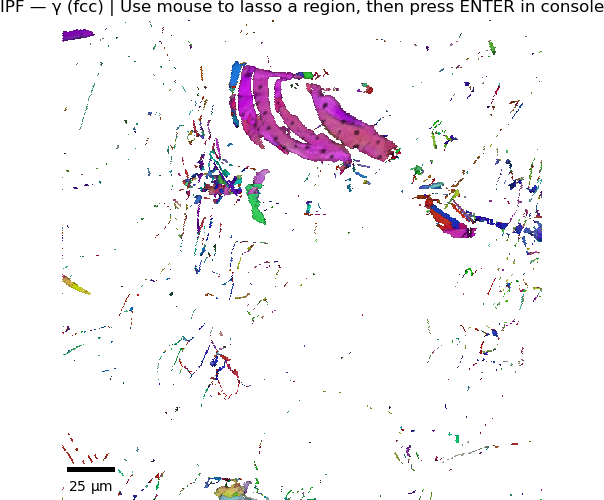

In [29]:
"""
Export selection as .ang (pyebsd) — customized for AS.ang
- Loads AS.ang from the current folder (edit ANGFILE if needed)
- Shows IPF (γ/fcc by default, ph==2) over IQ
- Lets you lasso-select a region
- Saves the selection to selection.ang and verifies by reloading
"""

from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt

# ===== user knobs =====
ANGFILE = Path("AS.ang")   # or Path("/full/path/to/AS.ang")
PHASE_ID = 2               # 2 → γ (fcc), 1 → δ (bcc)

# ===== imports & load =====
try:
    import pyebsd
except Exception as e:
    sys.exit(
        "[ERROR] pyebsd not installed in this kernel.\n"
        "Install in a notebook cell:\n"
        "  %pip install https://github.com/arthursn/pyebsd/archive/refs/heads/master.zip\n"
        f"Details: {e}"
    )

if not ANGFILE.exists():
    sys.exit(f"[ERROR] .ang file not found at: {ANGFILE.resolve()}")

scan = pyebsd.load_scandata(ANGFILE)

# ===== plotting & selection =====
plt.ion()  # interactive mode (in Jupyter, consider: %matplotlib widget)
IQ = getattr(scan, "IQ", None)

# IPF for the chosen phase (transparent background helps for overlaying if needed)
ipf = scan.plot_IPF(gray=IQ, sel=(scan.ph == PHASE_ID), colorfill="none")
title_tag = "γ (fcc)" if PHASE_ID == 2 else ("δ (bcc)" if PHASE_ID == 1 else f"ph={PHASE_ID}")
ipf.ax.set_title(f"IPF — {title_tag} | Use mouse to lasso a region, then press ENTER in console")

# Enable lasso selector; the selection mask will be available as ipf.sel
ipf.lasso_selector()

# Wait for user confirmation in the terminal/console
input("Press ENTER here to process the current lasso selection... ")

plt.ioff()

# ===== handle selection =====
sel = getattr(ipf, "sel", None)
if sel is None or (isinstance(sel, np.ndarray) and sel.size and not sel.any()):
    print("[WARN] No pixels selected — aborting export.")
else:
    # Show IPF of the selection (for visual confirmation)
    scan.plot_IPF(sel=sel, gray=IQ)
    plt.title(f"IPF — Selection preview ({title_tag})")
    plt.tight_layout()
    plt.savefig("IPF_selection_preview.png", dpi=300)
    print("✅ Saved: IPF_selection_preview.png")

    # Save selected subset to a new .ang
    out_ang = Path("selection.ang")
    try:
        scan.save_ang_file(out_ang.as_posix(), sel)
    except AttributeError:
        # Older API fallback
        pyebsd.save_ang_file(out_ang.as_posix(), scan, sel)
    print(f"✅ Wrote selection to: {out_ang.resolve()}")

    # Reload to verify and plot
    scansel = pyebsd.load_scandata(out_ang.as_posix())
    scansel.plot_IPF(gray=getattr(scansel, "IQ", None))
    plt.title("IPF — Reloaded selection.ang")
    plt.tight_layout()
    plt.savefig("IPF_selection_reloaded.png", dpi=300)
    print("✅ Saved: IPF_selection_reloaded.png")

plt.show()


Reading file "AS.ang"...
# GRID: HexGrid
# XSTEP: 0.500000
# YSTEP: 0.433013
# NCOLS_ODD: 501
# NCOLS_EVEN: 500
# NROWS: 578

289289 points read in 0.17 s

Select area on the IPF and press SHIFT or ENTER to continue

Calculating rotation matrices... 0.03 s
Plotting Inverse Pole Figure... 0.11 s


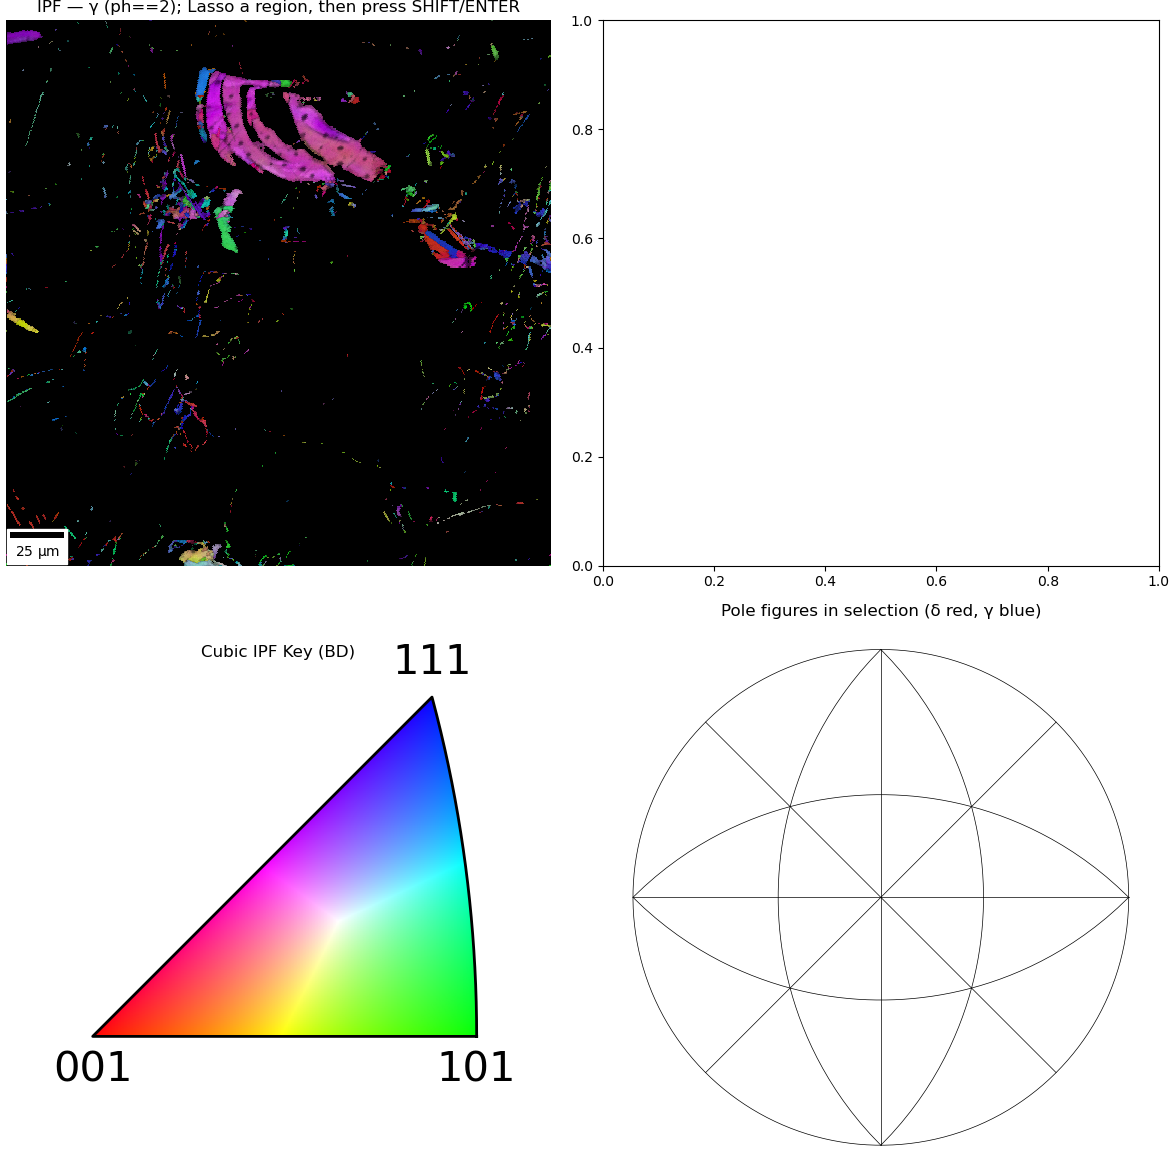

In [31]:
# -*- coding: utf-8 -*-
"""
Interactive lasso selection on IPF, then:
- compute average orientation of γ (fcc) in the selection
- plot IPF of the selected area
- overlay PFs of δ (bcc) and γ (fcc) in the same stereographic frame
"""

from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt


# If you're in Jupyter, uncomment the next two lines for a better interactive experience:
# %pip install ipympl -q
# %matplotlib widget

# ===== user knobs =====
ANGFILE = Path("AS.ang")   # or Path("/full/path/to/AS.ang")
GAMMA_ID = 2               # γ (fcc) ID in your .ang
DELTA_ID = 1               # δ (bcc) ID in your .ang
CI_MIN = 0.2               # confidence index threshold for averaging γ

# ===== imports & load =====
try:
    import pyebsd
except Exception as e:
    sys.exit(
        "[ERROR] pyebsd not installed in this kernel.\n"
        "In a notebook cell, run:\n"
        "  %pip install https://github.com/arthursn/pyebsd/archive/refs/heads/master.zip\n"
        f"Details: {e}"
    )

if not ANGFILE.exists():
    sys.exit(f"[ERROR] .ang file not found at: {ANGFILE.resolve()}")

# Work across pyebsd variants
try:
    scan = pyebsd.load_scandata(ANGFILE)
except AttributeError:
    scan = pyebsd.load_ang_file(ANGFILE)

IQ = getattr(scan, "IQ", None)
CI = getattr(scan, "CI", None)

print("\n\033[1mSelect area on the IPF and press SHIFT or ENTER to continue\033[0m\n")

# ===== figure layout =====
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axes.ravel()

# Unit triangle (IPF key)
pyebsd.unit_triangle(ax3)
ax3.set_xlim(-0.1, 0.5)
ax3.set_ylim(-0.1, 0.4)
ax3.set_title("Cubic IPF Key (BD)")

# Base IPF (γ only) on ax1; use IQ as grayscale underlay if available
ipf = scan.plot_IPF(sel=(scan.ph == GAMMA_ID), gray=IQ, ax=ax1)
ax1.set_title(f"IPF — γ (ph=={GAMMA_ID}); Lasso a region, then press SHIFT/ENTER")

# Enable lasso on that IPF
ipf.lasso_selector()

# Pre-create PF frame in ax4 (stereographic)
ax4.set_aspect("equal")
ax4.axis("off")
pyebsd.draw_circle_frame(ax4, lw=.5)
pyebsd.draw_std_traces(ax4, lw=.5)
ax4.set_title("Pole figures in selection (δ red, γ blue)")

# Handler: when user presses SHIFT/ENTER → process selection
def onkeypress(event):
    if event.key not in ("shift", "enter"):
        return

    sel = getattr(ipf, "sel", None)
    if sel is None or not np.any(sel):
        print("[WARN] No pixels selected.")
        return

    # Average γ orientation in selection (with CI filter if CI exists)
    sel_gamma = sel & (scan.ph == GAMMA_ID)
    if CI is not None:
        sel_gamma = sel_gamma & (CI > CI_MIN)

    if np.count_nonzero(sel_gamma) == 0:
        print(f"[WARN] No γ pixels found in selection (after CI>{CI_MIN} filter).")
        return

    # Average orientation matrix (3x3)
    M_fcc = pyebsd.average_orientation(
        scan.M, sel=sel_gamma, vectorized=False, verbose=True
    )

    # IPF of selection on ax2 (hex tiling looks nice)
    ax2.cla()
    scan.plot_IPF(sel=sel, gray=IQ, tiling='hex', ax=ax2)
    ax2.set_title("IPF — Selection preview")

    # Refresh PF frame
    ax4.cla()
    ax4.set_aspect('equal'); ax4.axis('off')
    pyebsd.draw_circle_frame(ax4, lw=.5)
    pyebsd.draw_std_traces(ax4, lw=.5)

    # PF for δ (bcc) in red, rotated so axes align with averaged γ
    try:
        scan.plot_PF(
            sel=(sel & (scan.ph == DELTA_ID)),
            contour=True,
            cmap=plt.get_cmap('Reds_r'),
            rotation=M_fcc.T,
            ax=ax4
        )
    except Exception as e:
        print(f"[info] δ PF plotting skipped: {e}")

    # PF for γ (fcc) in blue, same rotation
    try:
        scan.plot_PF(
            sel=(sel & (scan.ph == GAMMA_ID)),
            contour=True,
            cmap=plt.get_cmap('Blues_r'),
            rotation=M_fcc.T,
            ax=ax4
        )
    except Exception as e:
        print(f"[info] γ PF plotting skipped: {e}")

    # Also show a standalone IPF of the selected area (optional preview pop-up)
    scan.plot_IPF(sel=sel, gray=IQ)
    plt.title("IPF — Selection (standalone preview)")

    fig.canvas.draw_idle()

cid = fig.canvas.mpl_connect('key_press_event', onkeypress)

plt.tight_layout()
plt.show()


In [1]:
import sys
print(sys.executable)  # should point to .../envs/ebsd-py/bin/python


/home/menge/miniforge3/envs/ebsd-py/bin/python
